In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import Eq, symbols, Function, init_printing, dsolve, solve, expand
from sympy.utilities.lambdify import lambdify
from scipy.integrate import odeint

init_printing()

%matplotlib inline

# Моделювання вільного і обмеженого росту популяцій

## Task 1 Моделювання вільного росту популяції

In [2]:
t_0 = 12
N_0 = 73
r = 1.43
k = 70

### Диференціальне рівняння

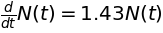

In [3]:
t, C1= symbols("t C1")
N = Function('N')
eq = Eq(N(t).diff(t), r*N(t))
eq

### Аналітичний розв'язок

In [4]:
res = dsolve(eq)
constant = solve((res.subs(t,t_0).subs(N(t_0),N_0),),{C1})
N_t = expand(res.subs(constant))
N_t

### Чисельний розв'язок

In [5]:
def equation(N, t, r):
    dNdt = r*N
    return dNdt

In [10]:
time = np.linspace(t_0, 15, 301)
N_numerical = odeint(equation, N_0, time, args=(r,))
N_numerical = N_numerical[:,0]
d = {'N(t)': {}}
for i in range(0, time.shape[0], 25):
    d['N(t)']['t = '+str(time[i])] = N_numerical[i].round(2)
pd.DataFrame.from_dict(d, orient='index')

,t = 12.0,t = 12.25,t = 12.5,t = 12.75,t = 13.0,t = 13.25,t = 13.5,t = 13.75,t = 14.0,t = 14.25,t = 14.5,t = 14.75,t = 15.0
N(t),73.0,104.37,149.23,213.36,305.05,436.14,623.57,891.55,1274.69,1822.49,2605.71,3725.51,5326.55


### Графік аналітичного розв'язку

In [11]:
N_analytical = lambdify(t, N_t.rhs)

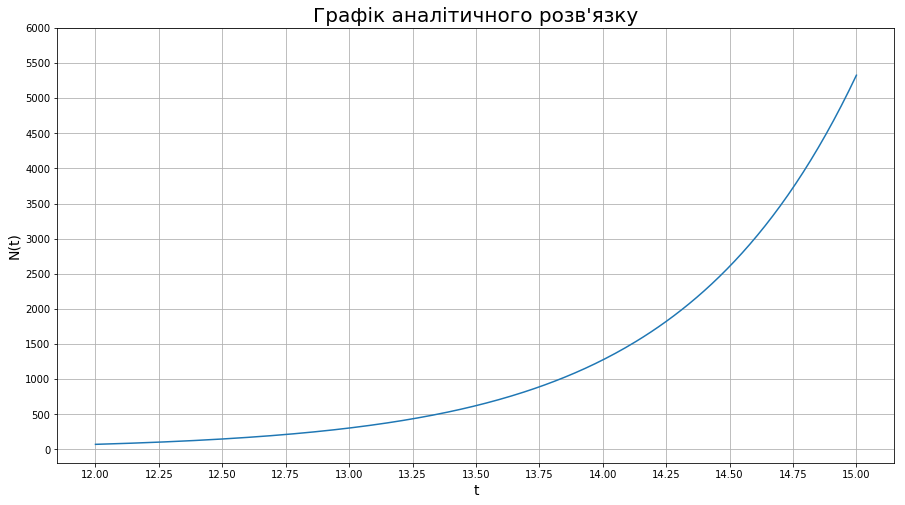

In [12]:
plt.figure(figsize=(15,8))
plt.title("Графік аналітичного розв\'язку", fontsize=20)
plt.plot(time, N_analytical(time))
plt.grid()
plt.xticks(np.arange(t_0, 15.25, 0.25))
plt.yticks(np.arange(0, 6001, 500))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.show()

### Графік чисельного розв'язку

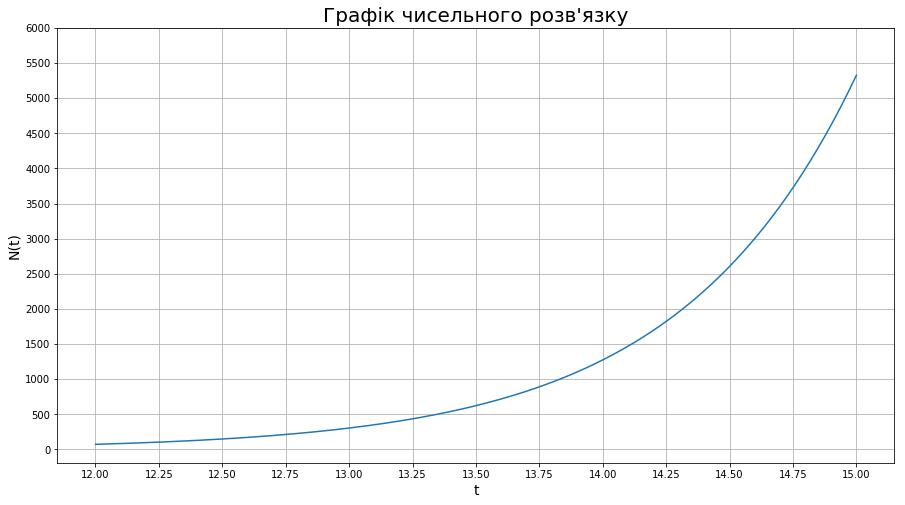

In [13]:
plt.figure(figsize=(15,8))
plt.title("Графік чисельного розв\'язку", fontsize=20)
plt.plot(time, N_numerical)
plt.grid()
plt.xticks(np.arange(t_0, 15.25, 0.25))
plt.yticks(np.arange(0, 6001, 500))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.show()

## Task 2 Моделювання обмеженого росту популяції

### Диференціальне рівняння

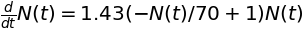

In [14]:
t, C1= symbols("t C1")
N = Function('N')
eq = Eq(N(t).diff(t), r*N(t)*(1 - N(t)/k))
eq

### Аналітичний розв'язок

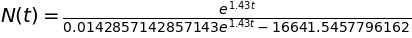

In [15]:
res = dsolve(eq, hint='Bernoulli')
constant = solve((res.subs(t,t_0).subs(N(t_0),N_0),),{C1})
N_t = expand(res.subs(constant))
N_t

### Чисельний розв'язок

In [16]:
def equation(N, t, r, k):
    dNdt = r*N*(1-N/k)
    return dNdt

In [18]:
time = np.linspace(t_0, 15, 601)
N_numerical = odeint(equation, N_0, time, args=(r,k))
N_numerical = N_numerical[:,0]
d = {'N(t)': {}}
for i in range(0, time.shape[0], 40):
    d['N(t)']['t = '+str(time[i])] = N_numerical[i].round(2)
pd.DataFrame.from_dict(d, orient='index')

,t = 12.0,t = 12.2,t = 12.4,t = 12.6,t = 12.8,t = 13.0,t = 13.2,t = 13.4,t = 13.6,t = 13.8,t = 14.0,t = 14.2,t = 14.4,t = 14.6,t = 14.8,t = 15.0
N(t),73.0,72.23,71.66,71.24,70.93,70.7,70.52,70.39,70.29,70.22,70.17,70.12,70.09,70.07,70.05,70.04


### Графік аналітичного розв'язку

In [19]:
N_analytical = lambdify(t, N_t.rhs)

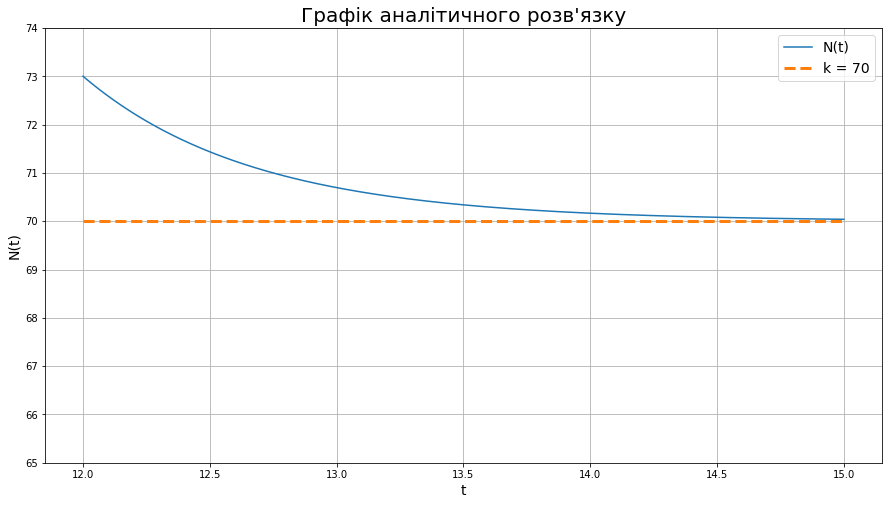

In [20]:
plt.figure(figsize=(15,8))
plt.title("Графік аналітичного розв\'язку", fontsize=20)
plt.plot(time, N_analytical(time), label='N(t)')
plt.plot(time, [k]*time.shape[0], '--', label='k = {}'.format(k), linewidth=3.0)
plt.grid()
plt.xticks(np.arange(t_0, 15.5, 0.5))
plt.yticks(np.arange(65, 75, 1))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Графік чисельного розв'язку

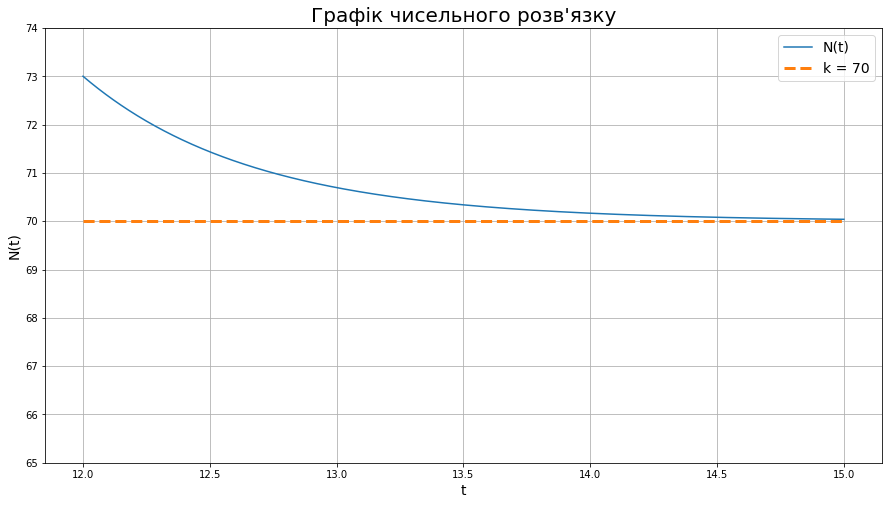

In [22]:
plt.figure(figsize=(15,8))
plt.title("Графік чисельного розв\'язку", fontsize=20)
plt.plot(time, N_numerical, label='N(t)')
plt.plot(time, [k]*time.shape[0], '--', label='k = {}'.format(k), linewidth=3.0)
plt.grid()
plt.xticks(np.arange(t_0, 15.5, 0.5))
plt.yticks(np.arange(65, 75, 1))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.legend(fontsize=14)
plt.show()